In [204]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('grayscale')

## Import MNIST dataset and load it

In [185]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Prepare the MNIST dataset by:
1. reshape it from () to (60000, 28, 28, 1)
2. scale the values in the [0, 1] interval

### Before

In [186]:
print(train_images.shape)
print(test_images.shape)
print(test_images[0][7][6])
# plt.imshow(test_images[0])

(60000, 28, 28)
(10000, 28, 28)
84


### Edit

In [187]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32')/255

### After

In [188]:
print(train_images.shape)
print(test_images.shape)
print(test_images[0][7][6][0])
# plt.imshow(test_images[0])

(60000, 28, 28, 1)
(10000, 28, 28, 1)
0.32941177


## Prepare the MNIST Labels using to_categorical()

In [189]:
# before
print(train_labels[0])
# edit
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)
# after
print(train_labels[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Create the model

In [190]:
cnnModel = keras.models.Sequential()

1. add Conv Layer

In [191]:
cnnModel.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))

2. add Pooling Layer, use max pooling method

In [192]:
cnnModel.add(keras.layers.MaxPooling2D((2, 2)))

3. add Flatten Layer

In [193]:
cnnModel.add(keras.layers.Flatten())

4. add Fully Connected Layer

In [194]:
cnnModel.add(keras.layers.Dense(14, activation='relu'))
cnnModel.add(keras.layers.Dense(10, activation='softmax'))
# summary
cnnModel.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 14)                87822     
                                                                 
 dense_9 (Dense)             (None, 10)                150       
                                                                 
Total params: 88292 (344.89 KB)
Trainable params: 88292 (344.89 KB)
Non-trainable params: 0 (0.00 Byte)
________________

## Compile the model and train it

In [195]:
cnnModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnnModel.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2023-11-11 19:41:46.706027: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 38s 19ms/step - loss: 0.2425 - accuracy: 0.9283
Epoch 2/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0844 - accuracy: 0.9752
Epoch 3/5
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0633 - accuracy: 0.9815
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0420 - accuracy: 0.9872


## Test the model

In [197]:
cnnModel.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0567 - accuracy: 0.9831


[0.05672887712717056, 0.9830999970436096]

## Predict

In [214]:
output = cnnModel.predict(test_images)

  1/313 [..............................] - ETA: 13s

313/313 [==============================] - 3s 9ms/step


7


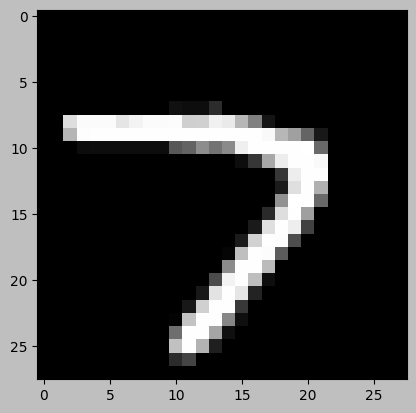

In [216]:
print(np.argmax(output[70]))
plt.imshow(test_images[70])